# Wedding Seating Optimization

> Objective: Maximize the overall relationship score by optimizing guest seatings within each table and then aggregating these scores across all tables.

# 0. Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

import random
import itertools
import math

from utils import *
from functions import *

from itertools import combinations


# 1. EDA

In [2]:
scores = pd.read_csv('seating_data.csv', index_col=0)

In [3]:
scores_array = scores.to_numpy()
scores_array[0][0]


np.int64(0)

In [4]:
scores

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
idx,,,,,,,,,,,,,,,,,,,,,
1,0,5000,0,0,700,700,0,0,0,0,...,100,100,0,0,100,100,100,0,0,0
2,5000,0,700,700,0,0,300,300,500,500,...,100,100,0,100,0,0,0,0,0,0
3,0,700,0,2000,0,0,0,0,300,300,...,0,0,0,0,0,0,0,0,0,0
4,0,700,2000,0,0,0,900,400,300,300,...,0,0,0,0,0,0,0,0,0,0
5,700,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,100,0,0,2000,700,700
62,0,0,0,0,0,0,0,0,0,0,...,0,0,-1000,0,100,0,2000,0,700,700


In [28]:
# For each of the guest, check the relationship values
print("Checking relationship values for each guest:")
for column in scores.columns:
    print(f"Unique relationship values for {column}:")
    print(f"{scores[column].value_counts()}")
    print()

Checking relationship values for each guest:
Unique relationship values for 1:
1
0       33
100     14
300      7
900      3
500      2
700      2
1000     2
5000     1
Name: count, dtype: int64

Unique relationship values for 2:
2
0       33
100     18
300      6
500      3
700      2
5000     1
1000     1
Name: count, dtype: int64

Unique relationship values for 3:
3
0       57
300      3
900      2
2000     1
700      1
Name: count, dtype: int64

Unique relationship values for 4:
4
0       57
300      3
700      1
2000     1
900      1
400      1
Name: count, dtype: int64

Unique relationship values for 5:
5
0      52
400     5
700     4
300     2
900     1
Name: count, dtype: int64

Unique relationship values for 6:
6
0      52
400     5
900     4
300     2
700     1
Name: count, dtype: int64

Unique relationship values for 7:
7
0       59
700      2
300      1
900      1
2000     1
Name: count, dtype: int64

Unique relationship values for 8:
8
0       59
700      2
300      1
400 

In [29]:
mean_values = {}
for col in scores.columns:
    mean_values[int(col)] = scores[col].mean()  
    
sorted_mean_values = sorted(mean_values.items(), key=lambda x: x[1], reverse=True)


In [3]:
# Associating the number to names
names = {
    "Groom": 1,
    "Bride": 2,
    "Bride's Father": 3,
    "Bride's Mother": 4,
    "Groom's Father": 5,
    "Groom's Mother": 6,
    "Bride's Aunt": [7, 12, 14],
    "Bride's Uncle": [8, 11, 13],
    "Bride's Cousin": [9, 10, 15],
    "Groom's Brother": [16, 17, 18],
    "Groom's Nephew": 19,
    "Groom's Sister in Law": [20, 22],
    "Groom's Niece": 21,
    "Groom's Cousin": [23, 28],
    "Groom's Uncle": [24, 26],
    "Groom's Aunt": [25, 27],
    "Bride's College Friends": [29, 30, 31, 32, 33, 34, 35, 36],
    "Groom's College Friends": [37, 38, 44, 50, 60],
    "Bride's Hometown Friends": [39, 40, 41, 42, 43, 45],
    "Bride and Groom's Padel Friends": [46, 47, 48, 49],
    "Bride's Work Friends": [51, 52, 53, 54, 55, 56, 57, 58],
    "Groom's Work Friends": [59, 61, 62, 63, 64],
}

id_to_name = {}
for name, ids in names.items():
    if isinstance(ids, list):
        for id_ in ids:
            id_to_name[id_] = name
    else:
        id_to_name[ids] = name

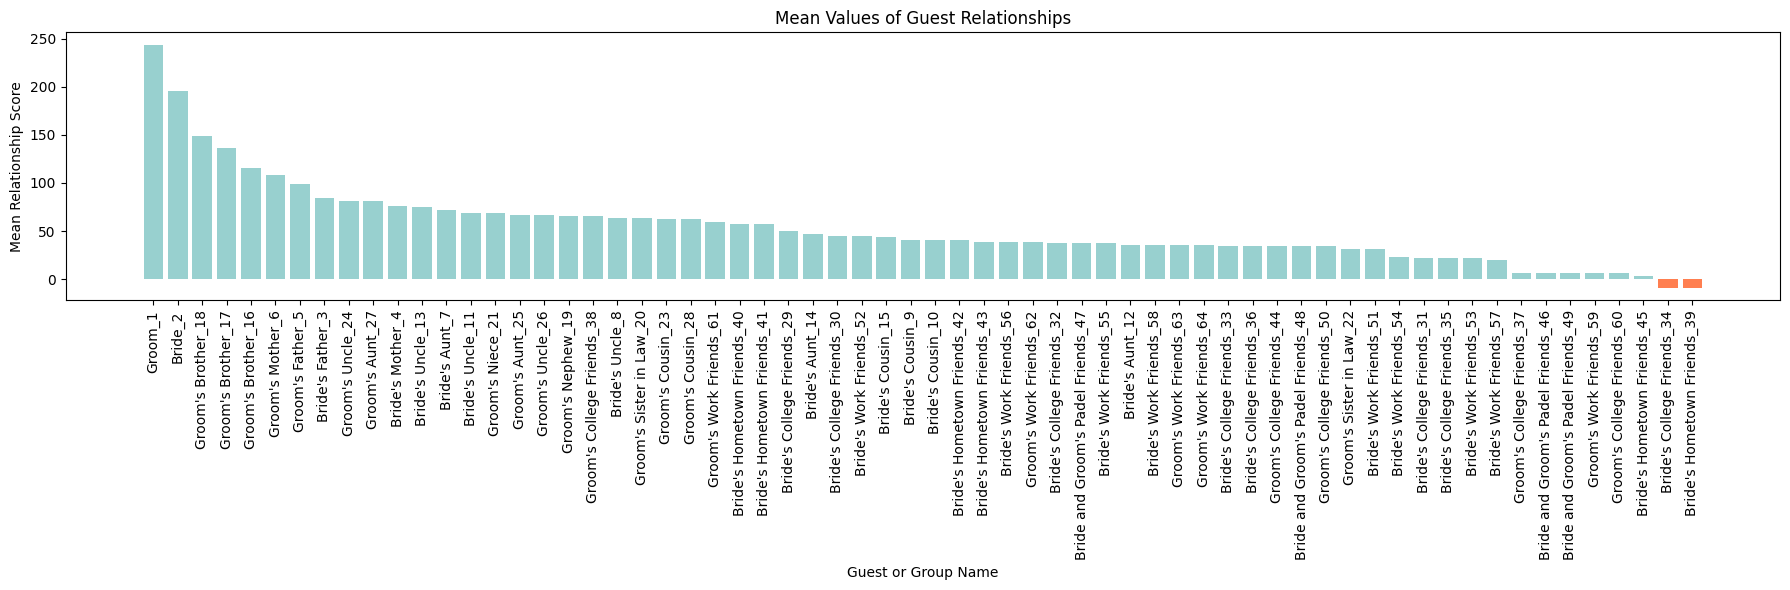

In [35]:
named_mean_values = []
for k, v in sorted_mean_values:
    if k in id_to_name:
        name = f"{id_to_name[k]}_{k}" 
        named_mean_values.append((name, v))

# Negative colors are in orange
colors = ['#ff7f50' if v[1] < 0 else '#98d0cf' for v in named_mean_values]

plt.figure(figsize=(18, 6))
plt.bar([x[0] for x in named_mean_values], [x[1] for x in named_mean_values], color=colors) 
plt.xticks(rotation=90)
plt.xlabel('Guest or Group Name')
plt.ylabel('Mean Relationship Score')
plt.title('Mean Values of Guest Relationships')
plt.tight_layout()
plt.show()


## 1.1 Relationships and meaning of the values

| Relationship               | Value  |
|----------------------------|--------|
| Bride or Groom             | 5000   |
| Spouse or Date             | 2000   |
| Best Friend                | 1000   |
| Siblings                   | 900    |
| Parent or Child            | 700    |
| Cousin                     | 500    |
| Aunt/Uncle or Niece/Nephew | 300    |
| Friend                     | 100    |
| Strangers                  | 0      |
| Enemies                    | -1000  |


# 2. Wedding Solution Representation 

> To represent the guests per table we will create a list of tables as such:
>| Table Number| Guests |
>|----------------------------|--------|
>| 1| [8 guests]   |
>| 2| [8 guests]   |
>| 3| [8 guests]    |
>| 4| [8 guests]    |
>| 5| [8 guests]    |
>| 6| [8 guests]    |
>| 7| [8 guests]    |
>| 8| [8 guests]    |



> For fitness function, we need to go through each table:
> - For each pair of guests check their relationship score using the relationship score df. 
> - Sum the relationship score for that table.
>  - Sum all the table scores.
$$
\sum _{t_\in T} \sum _ {i,j \in G_t i\neq j}  Relationship(i,j)
$$
> - $T = 8 $ (Number of tables)
> - $G_t = $ Guests seated at table $t$
> - $Relationship(i,j)$ is the relationship matrix </br>
> This way, we can calculate the fitness by summing the relationship scores for every pair of $i,j$ guests at each table.

> Note that for each table we can have $(8 \times 7)/2=28$ different pairs.</br>

> Wedding class solution, which uses the generic class ``Solution``.

In [71]:
# Example for how combinations work
table = [1, 2, 3, 4]
a = list(combinations(table, 2)) 
print(a)

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [70]:
solution = WeddingSolution(scores)

print(solution)

print(solution.fitness())


Table 1: [42, 37, 27, 50, 25, 24, 5, 17]
Table 2: [33, 48, 36, 8, 2, 39, 19, 45]
Table 3: [35, 22, 14, 13, 16, 52, 49, 18]
Table 4: [43, 28, 12, 4, 57, 60, 6, 7]
Table 5: [62, 10, 38, 21, 32, 44, 3, 26]
Table 6: [58, 53, 1, 51, 30, 29, 55, 34]
Table 7: [47, 63, 54, 15, 31, 61, 56, 59]
Table 8: [41, 23, 40, 64, 46, 11, 20, 9]
20700


> Now, let's create a population of 50.

In [6]:
initial_population = []
for i in range(50):
    new_pop =  WeddingSolution(scores)
    initial_population.append(new_pop)

In [7]:
initial_population

[
 Table 1: [32, 64, 43, 33, 31, 11, 48, 24]
 Table 2: [63, 25, 26, 50, 51, 14, 53, 13]
 Table 3: [40, 12, 5, 61, 36, 56, 49, 27]
 Table 4: [2, 42, 35, 23, 4, 30, 20, 21]
 Table 5: [1, 54, 62, 58, 47, 10, 46, 8]
 Table 6: [45, 37, 17, 6, 44, 3, 34, 57]
 Table 7: [9, 60, 18, 28, 19, 15, 59, 38]
 Table 8: [16, 52, 29, 7, 41, 55, 39, 22],
 
 Table 1: [40, 38, 11, 51, 17, 55, 41, 20]
 Table 2: [60, 58, 29, 10, 53, 35, 46, 36]
 Table 3: [1, 4, 42, 48, 43, 12, 47, 44]
 Table 4: [14, 45, 9, 37, 63, 57, 18, 32]
 Table 5: [64, 31, 27, 52, 26, 6, 3, 49]
 Table 6: [30, 59, 39, 61, 15, 28, 7, 16]
 Table 7: [23, 24, 22, 2, 8, 54, 34, 33]
 Table 8: [13, 19, 25, 21, 56, 50, 62, 5],
 
 Table 1: [64, 56, 12, 39, 38, 34, 25, 21]
 Table 2: [50, 20, 4, 23, 53, 8, 57, 51]
 Table 3: [17, 60, 5, 62, 33, 43, 49, 37]
 Table 4: [32, 14, 36, 40, 46, 15, 26, 59]
 Table 5: [6, 48, 3, 28, 52, 29, 45, 1]
 Table 6: [2, 58, 16, 63, 35, 44, 27, 18]
 Table 7: [47, 9, 13, 10, 11, 22, 41, 54]
 Table 8: [30, 24, 19, 42, 31

# 3. Wedding Genetic Algorithm

> Defined in functions. Explain a little here.

# 4. Selection algorithm

> [COMPARATIVE STUDY OF DIFFERENT SELECTION](https://www.researchgate.net/profile/Saneh-Yadav/publication/325011628_Comparative_Study_of_Different_Selection_Techniques_in_Genetic_Algorithm/links/5af1624da6fdcc24364b106b/Comparative-Study-of-Different-Selection-Techniques-in-Genetic-Algorithm.pdf)

## 4.1 Fitness proportionate selection

> Let's adapt the ``fitness_ proportionate_selection`` function from class, but instead of just appending the value 0.0000001 in the cases where the fitness value is negative, we will make it proportionate to its score. So it respects the **Point 2** presented in the course's book, given that even if the value is negative, if one is higher, then it should have a higher chance of being selected.</br>

> To accomplish this, we will add $f_{min} +1$ to all fitness values. Note that we add $+1$ so that even the worst individual has the chance of being selected.

How the last part works:
1. First we get a ``random_nr`` between 0 and ``total_fitness``
2. Culmulatively add the fitness values until it's >= than ``random_nr``

Index | Individual | Fitness | Range      | Cumulative
------|------------|---------|------------|------------
0     | 1          | 30      |  0 - 30    | box_boundary = 30
1     | 2          | 20      | 30 - 50    | box_boundary = 50
2     | 3          | 50      | 50 - 100   | box_boundary = 100


In [33]:
selected = fitness_proportionate_selection(initial_population,1)
print(selected)
print(selected.fitness())


Table 1: [39, 18, 5, 7, 44, 4, 31, 21]
Table 2: [33, 64, 50, 58, 62, 1, 42, 46]
Table 3: [25, 2, 53, 43, 28, 35, 6, 24]
Table 4: [57, 27, 3, 49, 13, 45, 10, 9]
Table 5: [63, 30, 11, 22, 19, 8, 17, 38]
Table 6: [14, 60, 32, 47, 36, 59, 26, 37]
Table 7: [23, 55, 51, 12, 52, 20, 34, 40]
Table 8: [56, 61, 16, 41, 54, 15, 48, 29]
11300


## 4.2 Ranking selection

> Let $N$ be the total population size, then each individual will be assigned a rank $r \in [1,N]$ based on their fitness:

> - Maximization: 1 = Worst fitness, N = Best fitness
> - Minimization: 1 = Best fitness, N = Worst fitness
> Since the higher the rank number, then larger the probability of being selected.</br>

> Once the individuals are ranked, to determine the probability of being chosen we need to select a function $\phi$: </br>
>- **Linear**: 
>$$P(\text{selecting }i)=\frac{\text{rank}(i)}{\sum^N_{j=1} \text{rank}(j)}$$
>- **Exponential**:
>$$P(\text{selecting } i)=\frac{e^{-\lambda \cdot(N-i)}}{\sum^N_{j=1}e^{-\lambda\cdot (N-j)}}$$
>Note: $\lambda$ denotes the selection pressure - higher values mean that top-ranked individuals will have exponentially higher probability of being selected.

> And to select the an individual, we will use the same code from the ``fitness_proportionate`` selection.

In [38]:
selected = rank_selection(initial_population, 'linear', True)
print(selected)
print(selected.fitness())


Table 1: [10, 29, 48, 52, 12, 18, 6, 38]
Table 2: [40, 47, 41, 27, 59, 16, 5, 30]
Table 3: [56, 13, 42, 21, 60, 63, 49, 61]
Table 4: [57, 3, 46, 8, 11, 22, 45, 23]
Table 5: [14, 58, 35, 64, 24, 32, 34, 15]
Table 6: [2, 37, 20, 4, 50, 26, 55, 17]
Table 7: [28, 36, 7, 44, 39, 9, 19, 31]
Table 8: [43, 1, 54, 62, 53, 25, 33, 51]
11800


In [37]:
selected = rank_selection(initial_population, 'exponential', True, 2)
print(selected)
print(selected.fitness())


Table 1: [38, 17, 40, 50, 42, 16, 36, 64]
Table 2: [21, 31, 4, 27, 6, 55, 54, 30]
Table 3: [20, 51, 48, 37, 53, 52, 22, 47]
Table 4: [25, 10, 23, 19, 63, 9, 34, 12]
Table 5: [26, 13, 45, 61, 5, 24, 41, 15]
Table 6: [43, 3, 2, 57, 1, 46, 8, 62]
Table 7: [49, 14, 32, 18, 29, 33, 35, 60]
Table 8: [7, 59, 28, 58, 39, 56, 44, 11]
19900


> Let's take a look at the effect of $\lambda$ value on the probability of being selected in a maximization problem:

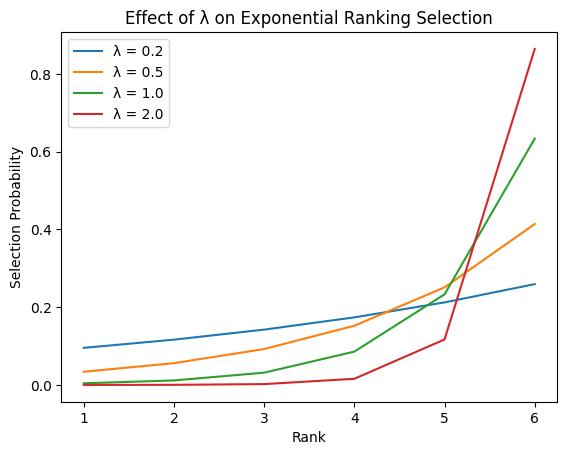

In [ ]:
# Fitness values of a population from 1-6
fitness_values = [i for i in range(1, 7)]

# Function to call the exponential probailities based on rank
def exponential_probabilities(n, l):
    ranking = list(range(1, n + 1))  # Rank individuals
    denominator = sum(math.exp(-l * (n - rank)) for rank in ranking)
    probabilities = [math.exp(-l * (n - rank)) / denominator for rank in ranking]
    return probabilities

# Different lambda values
l_values = [0.2, 0.5, 1.0, 2.0]
n = len(fitness_values)

for l in l_values:
    probs = exponential_probabilities(n, l)
    plt.plot(range(1, n + 1), probs, label=f"λ = {l}")

plt.xlabel("Rank")
plt.ylabel("Selection Probability")
plt.title("Effect of λ on Exponential Ranking Selection")
plt.legend()
plt.show()


## 4.3 Tournament Selection

> We compare the fitness of the individual not against the whole population, but a group $k$:
> 1. Choose a group o $k$ individuals, without replacement - meaning that once selected we can't put it back to select again for that k.
> 2. From that group choose the fittest.
>
> $k$ = tournament size, which decides the selection pressure. 

https://www.w3schools.com/python/ref_random_sample.asp

In [ ]:
def tournament_selection(population: list[Solution], k, maximization: bool):
    if k >= len(population):
        raise ValueError("Tournament size k must be smaller than the population size")
    
    tournament_group = random.sample(population, k)
    return fitness_proportionate_selection(tournament_group, maximization)


In [43]:
tournament_selection(initial_population,10,True)


Table 1: [42, 55, 35, 23, 46, 9, 59, 7]
Table 2: [43, 53, 15, 26, 2, 17, 50, 61]
Table 3: [60, 31, 40, 39, 16, 37, 13, 29]
Table 4: [52, 22, 21, 62, 41, 51, 44, 25]
Table 5: [49, 48, 10, 8, 45, 24, 47, 28]
Table 6: [38, 56, 30, 33, 4, 3, 6, 64]
Table 7: [20, 58, 19, 32, 57, 27, 5, 11]
Table 8: [12, 1, 18, 34, 63, 14, 36, 54]

## 4.4 Another one

# 5. Crossover

## 5.1 Classic order crossover

## 5.2 Partial mapped crossover

# 6. Mutation

## 6.1 Swap mutation

## 6.2 Insert mutation

## 6.3 Inversion mutation

## 6.4 Scramble mutation

# 7. Apply genetic algorithm